# 04 - Spillover Analysis (VAR)

Tujuan:
- Menguji apakah shock pada return Brent diteruskan ke:
  - EEM (EM equities)
  - BTC (crypto)

Metode:
- VAR(1 atau 2) dengan variabel:
  - r_Brent, r_EEM, r_BTC
- Impulse Response Function (IRF) untuk melihat efek shock Brent.


In [5]:
import pandas as pd
import statsmodels.api as sm

returns = pd.read_csv("returns_master.csv", parse_dates=["Date"], index_col="Date")

start_var = "2025-11-01"
end_var = "2026-01-31"

var_data = returns.loc[start_var:end_var, ["Brent", "EEM", "BTC"]].dropna()
var_data.head()

,Brent,EEM,BTC
Date,,,
2025-11-01,0.000000,0.000000,0.004625
2025-11-02,0.000000,0.000000,0.005216
2025-11-03,-0.002770,0.006309,-0.037687
2025-11-04,-0.006959,-0.018499,-0.047641
2025-11-05,-0.014380,0.008929,0.022400


estimasi VAR

In [6]:
model = sm.tsa.VAR(var_data)
selected_lag = model.select_order(maxlags=5)
print(selected_lag.summary())

# Ambil lag 1 misalnya (atau gunakan rekomendasi AIC)
lag_order = 1
var_res = model.fit(lag_order)
print(var_res.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -26.85     -26.74*   2.186e-12     -26.81*
1     -26.86*      -26.44  2.169e-12*      -26.69
2      -26.68      -25.95   2.599e-12      -26.39
3      -26.67      -25.62   2.649e-12      -26.26
4      -26.59      -25.23   2.896e-12      -26.06
5      -26.40      -24.72   3.568e-12      -25.74
-------------------------------------------------
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 04, Jan, 2026
Time:                     23:05:07
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -26.3534
Nobs:                     64.0000    HQIC:                  -26.5987
Log likelihood:           595.824    FPE:                2.39496e-12
AIC:                     -26.7581    Det(Omega_ml

c:\Users\jmjur\Documents\IPSD\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


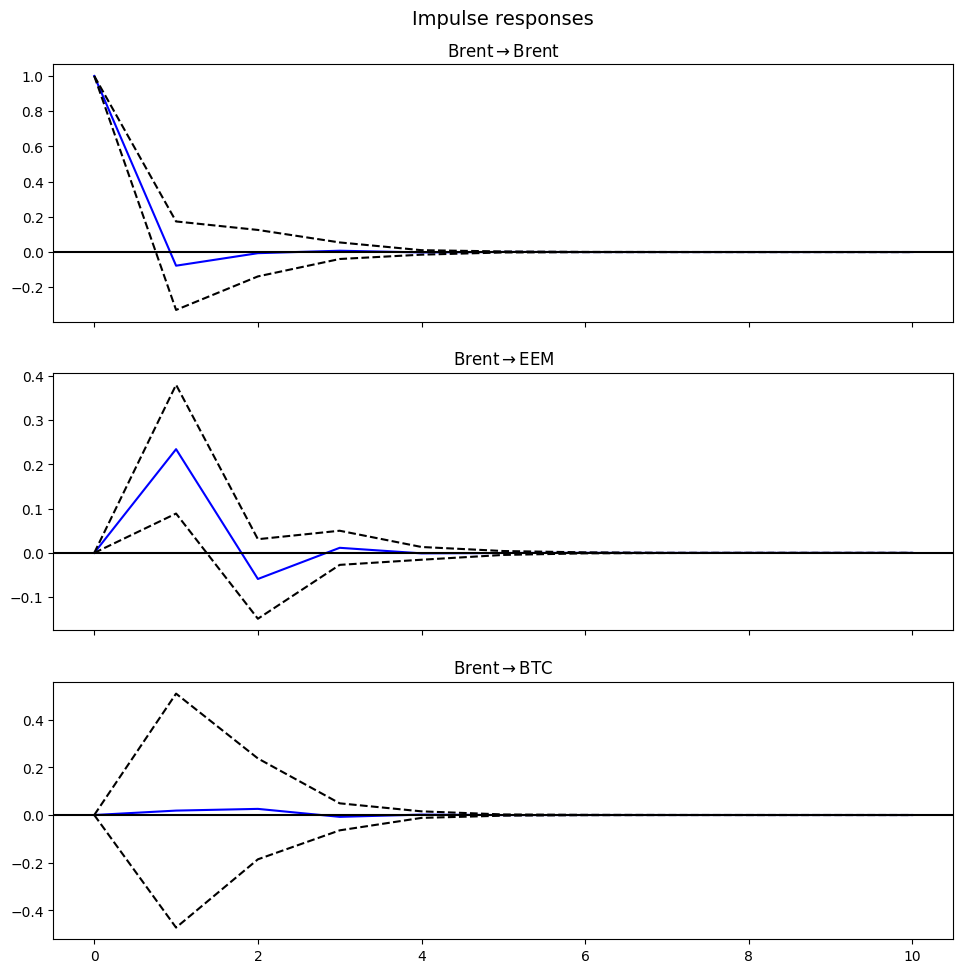

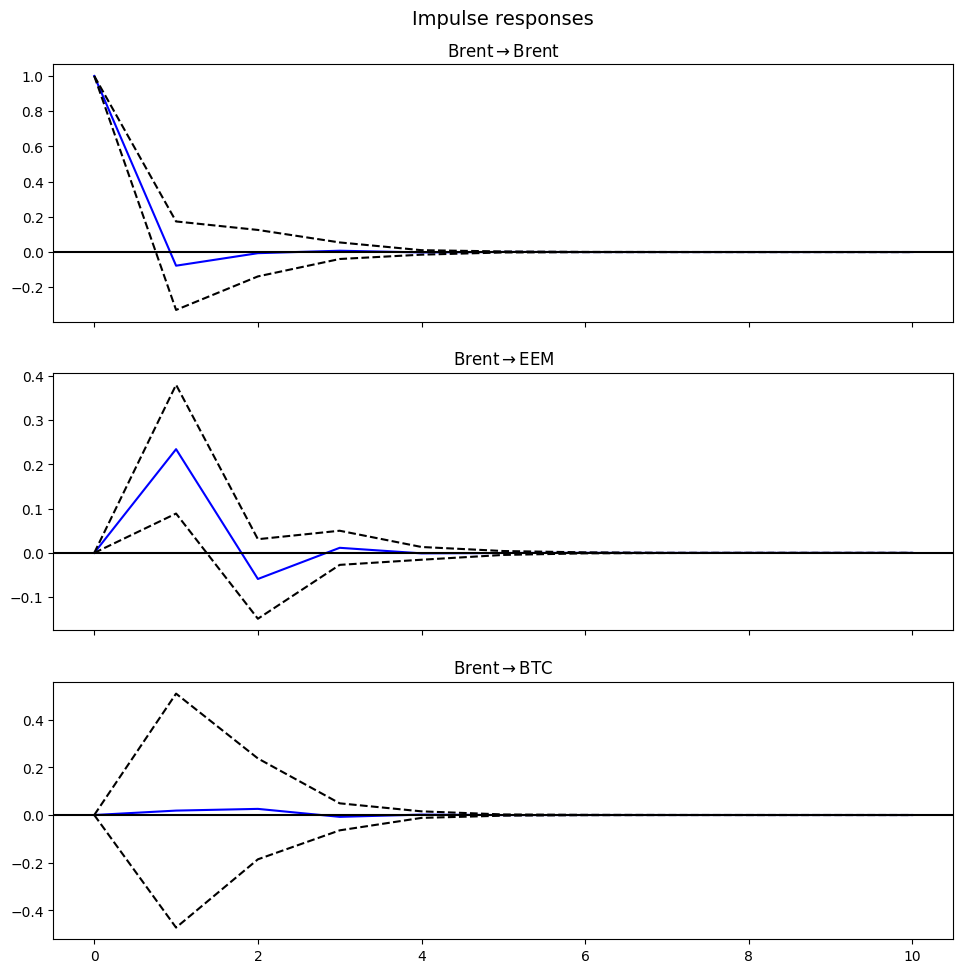

In [7]:
irf = var_res.irf(10)  # 10 hari ke depan
# Plot IRF shock Brent ke EEM dan BTC
irf.plot(orth=False, impulse="Brent")